In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filename='/kaggle/input/salary-dataset-of-business-levels/salary.csv'
df=pd.read_csv(filename)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv
/kaggle/input/salary-dataset-of-business-levels/salary.csv
/kaggle/input/walmart-sales/Walmart_sales.csv


In [18]:
df.head(20)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


In [26]:
df.describe()
df.columns
df['Level ']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level , dtype: int64

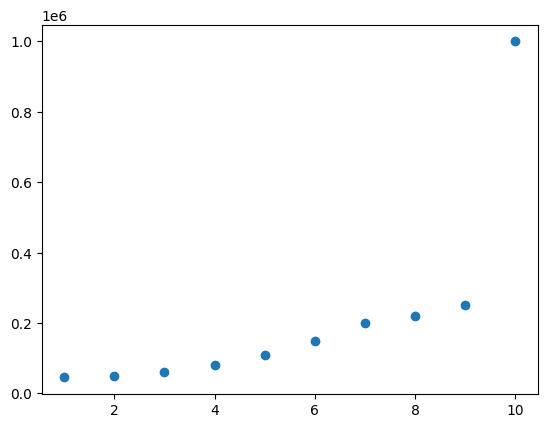

In [27]:
import matplotlib.pyplot as plt
df.sort_values(by='Salary')
plt.scatter(df['Level '],df['Salary'])

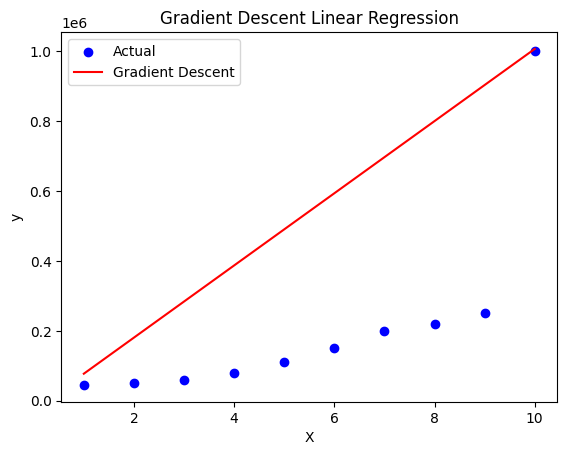

In [50]:
## fitting normal linear regression scikit learn
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor
df_temp=df[['Level ','Salary']]
model=SGDRegressor(max_iter=10000,learning_rate='constant',loss='squared_error',eta0=0.01)

df_temp['Level ']
x=df_temp['Level '].values.reshape(-1, 1)
y=df_temp['Salary'].values.reshape(-1, 1)
model.fit(x,y)
Y_pred=model.predict(x)
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, Y_pred, color='red', label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Linear Regression')
plt.legend()
plt.show()

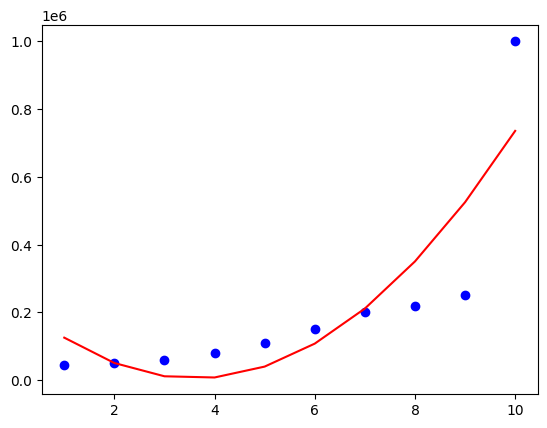

In [67]:
## using polynomial regression 

from sklearn.linear_model import SGDRegressor, LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

df_temp['Level ']
x=df_temp['Level '].values.reshape(-1, 1)
y=df_temp['Salary'].values.reshape(-1, 1)

poly_features=PolynomialFeatures(degree=2)
X_poly=poly_features.fit_transform(x)

# model=SGDRegressor(max_iter=100,learning_rate='constant',loss='squared_error',eta0=0.01)
model = LinearRegression()
model.fit(X_poly,y)
Y_pred=model.predict(X_poly)
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, Y_pred, color='red', label='Polynomial Regression')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.title('Polynomial Regression with Gradient Descent')
# plt.legend()
# plt.show()